# DATA PREPARATION

With Logistic Regression and XGBoost model, I check and label the sentiment of the dataset, including "OBJECTIVITY" and "ACTIVITY". After labeling all of the datasets manually, I stored them in a. Excel file (i.e. bbc_news_label_lgr_and_xgb.csv) and imported them by using the pandas library, and started to train the model.

In [1]:
# Improt libraries
!pip install xgboost
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read Files
# Load the dataset from a CSV file marked lables
df = pd.read_csv('bbc_news_label_lgr_and_xgb.csv')

# Display the DataFrame to get an overview of the data
df

,#,Title,Label
0,1,CAA: Microsoft boss calls India's new citizens...,OBJECTIVITY
1,2,Coronavirus: Microsoft warns of hit to compute...,OBJECTIVITY
2,3,Bill Gates steps down from Microsoft board to ...,OBJECTIVITY
3,4,George Floyd: Microsoft bars facial recognitio...,OBJECTIVITY
4,5,"World faces staggering jobs challenge, says Mi...",OBJECTIVITY
...,...,...,...
121,128,New York Times sues Microsoft and OpenAI for ‘...,ACTIVITY
122,129,Microsoft announces AI key on Windows 11 PCs,OBJECTIVITY
123,130,Microsoft denies it went back on its word on A...,OBJECTIVITY
124,131,Elon Musk sues ChatGPT-maker OpenAI over Micro...,ACTIVITY


In [3]:
#Check out the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       126 non-null    int64 
 1   Title   126 non-null    object
 2   Label   126 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [4]:
#Selection of labels and title
X = df['Title']
y = df['Label']
len(X)

126

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Convert string-type categories to integer-type categories
y_encoded = label_encoder.fit_transform(y)

# 检查转换后的类别
print("Transformed categories:", y_encoded)

Transformed categories: [1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1]


In [6]:
# Define a dictionary to map numerical labels to their corresponding class names
classes_names = { 0: 'ACTIVITY', 1: 'OBJECTIVITY'}

# Display the class names dictionary
classes_names

{0: 'ACTIVITY', 1: 'OBJECTIVITY'}

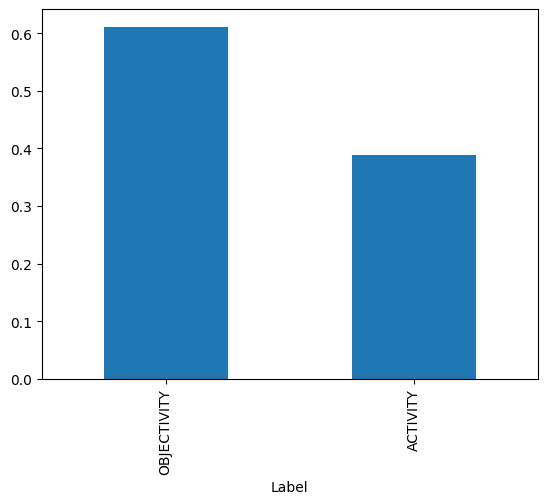

In [7]:
#Check out the distribution of the various catogorized labels in the dataset below
y.replace(classes_names).value_counts(normalize=True).plot(kind='bar');

The dataset is not very unbalanced, it is good for building the model

In [8]:
#Create a function to process text
#Remove stop words
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    # Remove square brackets and their contents
    title = re.sub('\[.*?\]', '', title)
    # Remove special characters
    title = re.sub("\\W"," ",title)
    # Remove URLs
    title = re.sub('https?://\S+|www\.\S+', '', title)
    # Remove HTML tags
    title = re.sub('<.*?>+', '', title)
    # Remove punctuation
    title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
    # Remove newlines
    title = re.sub('\n', '', title)
    # Remove words containing digits
    title = re.sub('\w*\d\w*', '', title)
    # Remove digits
    title = re.sub(r'\d+', '', title)
    # Remove stop words (customize the stop words list as needed)
    stopwords = ["the", "and", "of", "to", "in", "a", "for", "on", "with", "at", "is", "says"]
    title = ' '.join(word for word in title.split() if word not in stopwords)
    return title

In [9]:
# Display original titles
X

0      CAA: Microsoft boss calls India's new citizens...
1      Coronavirus: Microsoft warns of hit to compute...
2      Bill Gates steps down from Microsoft board to ...
3      George Floyd: Microsoft bars facial recognitio...
4      World faces staggering jobs challenge, says Mi...
                             ...                        
121    New York Times sues Microsoft and OpenAI for ‘...
122         Microsoft announces AI key on Windows 11 PCs
123    Microsoft denies it went back on its word on A...
124    Elon Musk sues ChatGPT-maker OpenAI over Micro...
125    British AI pioneer Mustafa Suleyman joins Micr...
Name: Title, Length: 126, dtype: object

In [10]:
X = X.apply(clean_title)
# Display handled titles
X

0      caa microsoft boss calls india s new citizensh...
1         coronavirus microsoft warns hit computer sales
2      bill gates steps down from microsoft board foc...
3      george floyd microsoft bars facial recognition...
4      world faces staggering jobs challenge microsof...
                             ...                        
121        new york times sues microsoft openai billions
122               microsoft announces ai key windows pcs
123    microsoft denies it went back its word activis...
124    elon musk sues chatgpt maker openai over micro...
125    british ai pioneer mustafa suleyman joins micr...
Name: Title, Length: 126, dtype: object

In [11]:
#Divide the data into a training set and a test set
X_train, X_test, y_encoded_train, y_encoded_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)
# Print the shapes of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_encoded_train.shape)
print(y_encoded_test.shape)

(100,)
(26,)
(100,)
(26,)


In [12]:
# Convert text to vectors
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [13]:
# Convert NumPy arrays to Pandas Series
y_encoded_series = pd.Series(y_encoded)

# Calculate the frequency of each category
score_baseline = y_encoded_series.value_counts(normalize=True).max()
print("Baseline model accuracy:", score_baseline)

Baseline model accuracy: 0.6111111111111112


__Analysis__


The baseline model accuracy of approximately 61.11% indicates the performance achieved by a simple approach where all predictions are assigned to the most frequently occurring class without any machine learning or predictive modeling. This baseline accuracy serves as a reference point for evaluating the effectiveness of more sophisticated models. Any model developed should aim to surpass this baseline accuracy to demonstrate its efficacy in making predictions.

# MODELING

__1, Logistic Regression Model__

In [14]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_encoded_train)

LogisticRegression(n_jobs=-1)

In [15]:
pred_lr=lr.predict(XV_test)
# get accuracy score
score_lr = accuracy_score(y_encoded_test, pred_lr)
score_lr

0.8461538461538461

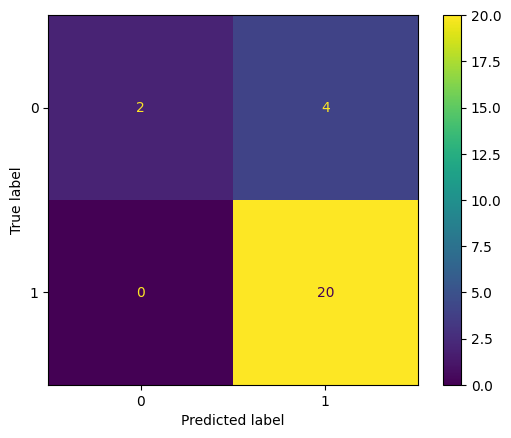

In [16]:
ConfusionMatrixDisplay.from_predictions(y_encoded_test, pred_lr);

__2, XGBOOST__

In [17]:
from xgboost import XGBClassifier
# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'n_estimators': 50,
    'max_depth': 3,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'lambda': 0.1,
    'n_jobs': -1,
    'tree_method': 'hist',
}

# Define the XGBoost model with specified parameters
xgb_model = XGBClassifier(**params)

# Train the model on the training set and evaluate it on the test se
xgb_model.fit(XV_train, y_encoded_train, eval_set=[(XV_test, y_encoded_test)],verbose=50)

[0]	validation_0-logloss:0.61692
[49]	validation_0-logloss:0.60655


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.05,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, ...)

__Analysis:__

For enhancing XGB model's performance, I decrease the n_estimators and max_depth to make the performance better.

In [18]:
pred_xgb=xgb_model.predict(XV_test)
# get accuracy score
score_xgb = accuracy_score(y_encoded_test, pred_xgb)
score_xgb

0.8461538461538461

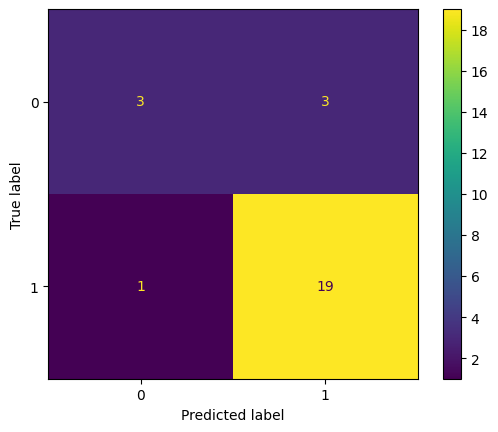

In [19]:
ConfusionMatrixDisplay.from_predictions(y_encoded_test, pred_xgb);

# EVALUATION AND RECOMMENDATION

These 2 models have a good prediction performance with an impressive accuracy of 84.61%. However, the confusion matrix shows that most of the tested observations are "OBJECTIVITY" labels, therefore, it has a little bias in the test set and the model is just good for predicting the "OBJECTIVITY" label.

Similarly, the XGBoost model has almost the same performance as the Logistic Regression model, there is a small difference in the prediction of the "ACTIVITY" label.

All in all, these 2 models can be better at identifying the news related to "OBJECTIVITY" and need an enhancement for predicting "ACTIVITY" news. One of the solutions can be collecting more titles and training the model again.

In [20]:
def output_label(n):
    # Function to return a formatted string indicating the sentiment of the text based on its numerical label
    return f'The Title Category is {classes_names[n]}'

def manual_testing(news):
    # Function to test the sentiment analysis models with a new piece of news (or text)
    # Create a dictionary with the text under the key 'text'
    testing_news = {"title": [news]}
    # Convert the dictionary into a pandas DataFrame
    new_def_test = pd.DataFrame(testing_news)
    # Preprocess the text using the previously defined 'clean_title' function
    new_def_test["title"] = new_def_test["title"].apply(clean_title)
    # Extract the text column for further processing
    new_x_test = new_def_test["title"]
    # Transform the text data to a format suitable for the model using the previously fitted 'vectorization'
    new_xv_test = vectorization.transform(new_x_test)
    # Predict the sentiment using the logistic regression model
    pred_lr = lr.predict(new_xv_test)
    # Predict the sentiment using the XGBoost model
    pred_xgb = xgb_model.predict(new_xv_test)
    # Print the predictions from both models
    print(f'{output_label(pred_lr[0])} (lr)')
    print(f'{output_label(pred_xgb[0])} (XGB)')

In [21]:
# enter a title to find if its category
text = "Microsoft's revenue is increasing."
manual_testing(text)

The Title Category is OBJECTIVITY (lr)
The Title Category is OBJECTIVITY (XGB)


### SAVE THE MODEL INTO PICKLE FILE

In [22]:
import pickle
lgr_model_save = "logistic_regression_model.pickle"
xgb_model_save = "xg_boost_model.pickle"
# save model
pickle.dump(lr, open(lgr_model_save, "wb"))
pickle.dump(xgb_model, open(xgb_model_save, "wb"))